<a href="https://colab.research.google.com/github/lcnychh/da_nychh/blob/master/DA_Unit3_Project2_Arthritis_LC_0803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 3 - Project 2 - Arthritis Data Analysis**

**The Data Background**

**U.S. CDC CDI (Chronic Disease Indicator)**

This is the source of data for the analysis. 

The data is provided by Centers for Disease Control and Prevention, National Center for Chronic Disease Prevention and Health Promotion, Dvision of Population Health.

CDC's Division of Population Health provides cross-cutting set of 124 indicators that were developed by consensus and that allows states and territories and large metropolitan areas to uniformly define, collect, and report chronic disease data that are important to public health practice and available for states, territories and large metropolitan areas.

**Data Acquisition**

The following libraries were imported:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
!pip install sodapy

In [ ]:
from sodapy import Socrata

In [ ]:
#establishing the connection with CDC
client = Socrata("chronicdata.cdc.gov", None)

In [ ]:
# access CDC data
# results = client.get("g4ie-h725", limit=2000)
results = client.get("g4ie-h725", limit=816000)

In [ ]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

**All Topics raw data**

In [ ]:
results_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
0,2017,2017,RI,Rhode Island,YRBSS,Tobacco,Current smokeless tobacco use among youth,%,Crude Prevalence,8.0,8.0,5.2,12.3,Gender,Male,"{'latitude': '41.70828019300046', 'longitude':...",44,TOB,TOB2_1,CRDPREV,GENDER,GENM,27,2658,NaN,NaN
1,2013,2013,MS,Mississippi,BRFSS,Arthritis,Fair or poor health among adults aged >= 18 ye...,%,Crude Prevalence,46.9,46.9,42.3,51.6,Gender,Male,"{'latitude': '32.745510099000455', 'longitude'...",28,ART,ART4_0,CRDPREV,GENDER,GENM,32,494,NaN,NaN
2,2016,2016,KY,Kentucky,BRFSS,Cancer,Papanicolaou smear use among adult women aged ...,%,Age-adjusted Prevalence,76.9,76.9,59.4,88.3,Race/Ethnicity,"Multiracial, non-Hispanic","{'latitude': '37.645970271000465', 'longitude'...",21,CAN,CAN2_1,AGEADJPREV,RACE,MRC,36,235,NaN,NaN
3,2015,2015,KS,Kansas,BRFSS,Tobacco,Quit attempts in the past year among current s...,%,Age-adjusted Prevalence,53.2,53.2,50.3,56.0,Gender,Male,"{'latitude': '38.34774030000045', 'longitude':...",20,TOB,TOB3_0,AGEADJPREV,GENDER,GENM,17,1287,NaN,NaN
4,2015,2015,ND,North Dakota,ACS 1-Year Estimates,Overarching Conditions,Poverty,%,Crude Prevalence,8.9,8.9,8.2,9.6,Race/Ethnicity,"White, non-Hispanic","{'latitude': '47.47531977900047', 'longitude':...",38,OVC,OVC3_1,CRDPREV,RACE,WHT,3,568,NaN,NaN


In [ ]:
results_df.shape

(814937, 26)

^There are 814,937 datapoints and 26 features in the dataframe as of 8/3/20.

In [ ]:
results_df.columns

Index(['yearstart', 'yearend', 'locationabbr', 'locationdesc', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
       'datavaluealt', 'lowconfidencelimit', 'highconfidencelimit',
       'stratificationcategory1', 'stratification1', 'geolocation',
       'locationid', 'topicid', 'questionid', 'datavaluetypeid',
       'stratificationcategoryid1', 'stratificationid1',
       ':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8',
       'datavaluefootnotesymbol', 'datavaluefootnote'],
      dtype='object')

In [ ]:
results_df.topic.unique()

array(['Tobacco', 'Arthritis', 'Cancer', 'Overarching Conditions',
       'Disability', 'Alcohol', 'Asthma', 'Older Adults',
       'Cardiovascular Disease',
       'Nutrition, Physical Activity, and Weight Status',
       'Chronic Obstructive Pulmonary Disease', 'Chronic Kidney Disease',
       'Diabetes', 'Oral Health', 'Mental Health', 'Immunization',
       'Reproductive Health'], dtype=object)

In [ ]:
results_df.locationabbr.unique()

array(['RI', 'MS', 'KY', 'KS', 'ND', 'AZ', 'IA', 'CT', 'US', 'AR', 'NE',
       'IL', 'SD', 'TN', 'GU', 'VA', 'PR', 'ID', 'WY', 'MN', 'CO', 'MD',
       'NM', 'UT', 'MT', 'OH', 'MO', 'PA', 'AL', 'DE', 'NY', 'NV', 'VI',
       'NC', 'OR', 'LA', 'MI', 'ME', 'WI', 'VT', 'WV', 'GA', 'HI', 'TX',
       'NJ', 'FL', 'AK', 'CA', 'OK', 'DC', 'SC', 'IN', 'MA', 'WA', 'NH'],
      dtype=object)

**Data Wrangling - cleansing and filtering of data**

**Data for Arthritis**

In [ ]:
art_cdi_df = results_df[results_df['topic']=='Arthritis']

In [ ]:
art_cdi_df.head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
1,2013,2013,MS,Mississippi,BRFSS,Arthritis,Fair or poor health among adults aged >= 18 ye...,%,Crude Prevalence,46.9,46.9,42.3,51.6,Gender,Male,"{'latitude': '32.745510099000455', 'longitude'...",28,ART,ART4_0,CRDPREV,GENDER,GENM,32,494,NaN,NaN
7,2015,2015,AZ,Arizona,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Crude Prevalence,23.6,23.6,22.5,24.8,Overall,Overall,"{'latitude': '34.865970280000454', 'longitude'...",04,ART,ART1_1,CRDPREV,OVERALL,OVR,7,986,NaN,NaN
20,2018,2018,GU,Guam,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,23.1,23.1,17.3,30.1,Gender,Male,"{'latitude': '13.444304', 'longitude': '144.79...",66,ART,ART1_2,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
24,2018,2018,TN,Tennessee,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,25.7,25.7,16.0,38.6,Race/Ethnicity,Hispanic,"{'latitude': '35.68094058000048', 'longitude':...",47,ART,ART1_1,AGEADJPREV,RACE,HIS,39,2159,NaN,NaN
28,2018,2018,PR,Puerto Rico,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Crude Prevalence,30.4,30.4,28.4,32.4,Gender,Female,"{'latitude': '18.220833', 'longitude': '-66.59...",72,ART,ART1_1,CRDPREV,GENDER,GENF,NaN,3050,NaN,NaN


In [ ]:
art_cdi_df.shape

(54810, 26)

In [ ]:
art_cdi_df[art_cdi_df['datavalue'].isnull()]

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
55,2018,2018,VI,Virgin Islands,BRFSS,Arthritis,Physical inactivity among adults aged >= 18 ye...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic","{'latitude': '18.335765', 'longitude': '-64.89...",78,ART,ART3_0,CRDPREV,RACE,MRC,NaN,NaN,-,No data available
95,2018,2018,VI,Virgin Islands,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Crude Prevalence,NaN,NaN,NaN,NaN,Gender,Female,"{'latitude': '18.335765', 'longitude': '-64.89...",78,ART,ART1_1,CRDPREV,GENDER,GENF,NaN,NaN,-,No data available
117,2018,2018,VI,Virgin Islands,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ha...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Other, non-Hispanic","{'latitude': '18.335765', 'longitude': '-64.89...",78,ART,ART1_3,CRDPREV,RACE,OTH,NaN,NaN,-,No data available
157,2017,2017,IL,Illinois,BRFSS,Arthritis,Adults aged >= 18 years with arthritis who hav...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"White, non-Hispanic","{'latitude': '40.48501028300046', 'longitude':...",17,ART,ART5_0,AGEADJPREV,RACE,WHT,34,1795,-,No data available
199,2015,2015,VI,Virgin Islands,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Crude Prevalence,NaN,NaN,NaN,NaN,Overall,Overall,"{'latitude': '18.335765', 'longitude': '-64.89...",78,ART,ART1_2,CRDPREV,OVERALL,OVR,NaN,NaN,-,No data available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715813,2011,2011,UT,Utah,BRFSS,Arthritis,Severe joint pain due to arthritis among adult...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '39.360700171000474', 'longitude'...",49,ART,ART2_2,AGEADJPREV,RACE,BLK,13,900,****,Sample size of denominator and/or age group fo...
716118,2011,2011,VT,Vermont,BRFSS,Arthritis,Work limitation due to arthritis among adults ...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Multiracial, non-Hispanic","{'latitude': '43.62538123900049', 'longitude':...",50,ART,ART2_3,AGEADJPREV,RACE,MRC,28,3218,****,Sample size of denominator and/or age group fo...
716518,2011,2011,AK,Alaska,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '64.84507995700051', 'longitude':...",02,ART,ART2_1,AGEADJPREV,RACE,BLK,51,1673,****,Sample size of denominator and/or age group fo...
716553,2011,2011,PR,Puerto Rico,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '18.220833', 'longitude': '-66.59...",72,ART,ART2_1,AGEADJPREV,RACE,BLK,NaN,3050,****,Sample size of denominator and/or age group fo...


In [ ]:
art_cdi_df.isnull().sum()

yearstart                          0
yearend                            0
locationabbr                       0
locationdesc                       0
datasource                         0
topic                              0
question                           0
datavalueunit                      0
datavaluetype                      0
datavalue                      16868
datavaluealt                   16868
lowconfidencelimit             16868
highconfidencelimit            16868
stratificationcategory1            0
stratification1                    0
geolocation                      378
locationid                         0
topicid                            0
questionid                         0
datavaluetypeid                    0
stratificationcategoryid1          0
stratificationid1                  0
:@computed_region_bxsw_vy29     3402
:@computed_region_he4y_prf8     2394
datavaluefootnotesymbol        37588
datavaluefootnote              37588
dtype: int64

In [ ]:
art_cdi_df = art_cdi_df[art_cdi_df['datavalue'].notna()]
art_cdi_df.shape

(37942, 26)

In [ ]:
art_cdi_df[art_cdi_df['datavalue'].isnull()]

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote


In [ ]:
art_cdi_df.isnull().sum()

yearstart                          0
yearend                            0
locationabbr                       0
locationdesc                       0
datasource                         0
topic                              0
question                           0
datavalueunit                      0
datavaluetype                      0
datavalue                          0
datavaluealt                       0
lowconfidencelimit                 0
highconfidencelimit                0
stratificationcategory1            0
stratification1                    0
geolocation                      354
locationid                         0
topicid                            0
questionid                         0
datavaluetypeid                    0
stratificationcategoryid1          0
stratificationid1                  0
:@computed_region_bxsw_vy29     1425
:@computed_region_he4y_prf8      951
datavaluefootnotesymbol        37588
datavaluefootnote              37588
dtype: int64

In [ ]:
art_cdi_df.datasource.unique()

array(['BRFSS'], dtype=object)

Data from BRFSS datasource

In [ ]:
art_cdi_df[art_cdi_df['datasource']=='BRFSS'].head()

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
1,2013,2013,MS,Mississippi,BRFSS,Arthritis,Fair or poor health among adults aged >= 18 ye...,%,Crude Prevalence,46.9,46.9,42.3,51.6,Gender,Male,"{'latitude': '32.745510099000455', 'longitude'...",28,ART,ART4_0,CRDPREV,GENDER,GENM,32,494,NaN,NaN
7,2015,2015,AZ,Arizona,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Crude Prevalence,23.6,23.6,22.5,24.8,Overall,Overall,"{'latitude': '34.865970280000454', 'longitude'...",04,ART,ART1_1,CRDPREV,OVERALL,OVR,7,986,NaN,NaN
20,2018,2018,GU,Guam,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,23.1,23.1,17.3,30.1,Gender,Male,"{'latitude': '13.444304', 'longitude': '144.79...",66,ART,ART1_2,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
24,2018,2018,TN,Tennessee,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,25.7,25.7,16.0,38.6,Race/Ethnicity,Hispanic,"{'latitude': '35.68094058000048', 'longitude':...",47,ART,ART1_1,AGEADJPREV,RACE,HIS,39,2159,NaN,NaN
28,2018,2018,PR,Puerto Rico,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Crude Prevalence,30.4,30.4,28.4,32.4,Gender,Female,"{'latitude': '18.220833', 'longitude': '-66.59...",72,ART,ART1_1,CRDPREV,GENDER,GENF,NaN,3050,NaN,NaN


In [ ]:
art_cdi_df.shape

(37942, 26)

^There are 37,942 datapoints and 26 features in the dataframe from BRFSS after data cleansing as of 8/3/20.

Unique Questions

In [ ]:
art_cdi_df.question.unique()

array(['Fair or poor health among adults aged >= 18 years with arthritis',
       'Arthritis among adults aged >= 18 years',
       'Arthritis among adults aged >= 18 years who are obese',
       'Arthritis among adults aged >= 18 years who have diabetes',
       'Physical inactivity among adults aged >= 18 years with arthritis',
       'Arthritis among adults aged >= 18 years who have heart disease',
       'Work limitation due to arthritis among adults aged 18-64 years who have doctor-diagnosed arthritis',
       'Severe joint pain due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis',
       'Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms',
       'Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis'],
      dtype=object)

In [ ]:
art_cdi_df.groupby(['question'])['datavalue'].count()

question
Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis     1834
Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms     411
Arthritis among adults aged >= 18 years                                                                    6440
Arthritis among adults aged >= 18 years who are obese                                                      5240
Arthritis among adults aged >= 18 years who have diabetes                                                  4578
Arthritis among adults aged >= 18 years who have heart disease                                             4181
Fair or poor health among adults aged >= 18 years with arthritis                                           5384
Physical inactivity among adults aged >= 18 years with arthritis                                           5245
Severe joint pain due to arthritis among adults aged >= 18 years who have doctor-diagnosed arth

**Selected Questions**

What are the data values, comparison, and trends in NY vs. TX for the following?
1.   Arthritis among adults aged >= 18 years across race/ethnicity
2.   Fair or poor health among adults aged >= 18 years with arthritis across genders 
3.   Arthritis among adults aged >= 18 years who have diabetes across genders
4.   Arthritis among adults aged >= 18 years who have heart disease across genders
5.   Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms across genders


Unique stratificationcategory1

In [ ]:
art_cdi_df.stratificationcategory1.unique()

array(['Gender', 'Overall', 'Race/Ethnicity'], dtype=object)

Unique datavaluetype

In [ ]:
art_cdi_df.groupby(['datavaluetype'])['datavalue'].count()

datavaluetype
Age-adjusted Prevalence    19090
Crude Prevalence           18852
Name: datavalue, dtype: int64

Filter for Age-adjusted Prevalence datavaluetype

In [ ]:
art_cdi_aap_df = art_cdi_df[art_cdi_df['datavaluetype']=='Age-adjusted Prevalence']
art_cdi_aap_df

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,datavalueunit,datavaluetype,datavalue,datavaluealt,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,geolocation,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,:@computed_region_bxsw_vy29,:@computed_region_he4y_prf8,datavaluefootnotesymbol,datavaluefootnote
20,2018,2018,GU,Guam,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,23.1,23.1,17.3,30.1,Gender,Male,"{'latitude': '13.444304', 'longitude': '144.79...",66,ART,ART1_2,AGEADJPREV,GENDER,GENM,NaN,NaN,NaN,NaN
24,2018,2018,TN,Tennessee,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,25.7,25.7,16.0,38.6,Race/Ethnicity,Hispanic,"{'latitude': '35.68094058000048', 'longitude':...",47,ART,ART1_1,AGEADJPREV,RACE,HIS,39,2159,NaN,NaN
32,2018,2018,CO,Colorado,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,25.3,25.3,21.1,30.0,Race/Ethnicity,Hispanic,"{'latitude': '38.843840757000464', 'longitude'...",08,ART,ART1_2,AGEADJPREV,RACE,HIS,9,1398,NaN,NaN
33,2018,2018,MD,Maryland,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ha...,%,Age-adjusted Prevalence,45.7,45.7,37.4,54.2,Race/Ethnicity,"White, non-Hispanic","{'latitude': '39.29058096400047', 'longitude':...",24,ART,ART1_4,AGEADJPREV,RACE,WHT,45,1857,NaN,NaN
36,2018,2018,IL,Illinois,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,28.6,28.6,26.4,30.9,Overall,Overall,"{'latitude': '40.48501028300046', 'longitude':...",17,ART,ART1_2,AGEADJPREV,OVERALL,OVR,34,1795,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714003,2011,2011,WA,Washington,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,36.8,36.8,18.7,59.5,Race/Ethnicity,"Black, non-Hispanic","{'latitude': '47.52227862900048', 'longitude':...",53,ART,ART2_1,AGEADJPREV,RACE,BLK,6,2956,NaN,NaN
714771,2011,2011,NV,Nevada,BRFSS,Arthritis,Work limitation due to arthritis among adults ...,%,Age-adjusted Prevalence,42.4,42.4,33.5,51.8,Race/Ethnicity,"White, non-Hispanic","{'latitude': '39.493240390000494', 'longitude'...",32,ART,ART2_3,AGEADJPREV,RACE,WHT,10,481,NaN,NaN
715749,2011,2011,CA,California,BRFSS,Arthritis,Work limitation due to arthritis among adults ...,%,Age-adjusted Prevalence,34.2,34.2,29.5,39.3,Gender,Female,"{'latitude': '37.63864012300047', 'longitude':...",06,ART,ART2_3,AGEADJPREV,GENDER,GENF,8,1340,NaN,NaN
716293,2011,2011,NH,New Hampshire,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,53.1,53.1,48.0,58.2,Overall,Overall,"{'latitude': '43.65595011300047', 'longitude':...",33,ART,ART2_1,AGEADJPREV,OVERALL,OVR,26,2405,NaN,NaN


Selected columns

In [ ]:
features_art = ['yearstart', 'locationabbr', 'datasource',
       'topic', 'question', 'datavalueunit', 'datavaluetype', 'datavalue',
        'stratificationcategory1', 'stratification1']

In [ ]:
art_cdi_df_01 = art_cdi_aap_df[features_art]
art_cdi_df_01.head()

,yearstart,locationabbr,datasource,topic,question,datavalueunit,datavaluetype,datavalue,stratificationcategory1,stratification1
20,2018,GU,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,23.1,Gender,Male
24,2018,TN,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,25.7,Race/Ethnicity,Hispanic
32,2018,CO,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,25.3,Race/Ethnicity,Hispanic
33,2018,MD,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ha...,%,Age-adjusted Prevalence,45.7,Race/Ethnicity,"White, non-Hispanic"
36,2018,IL,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,28.6,Overall,Overall


Unique years

In [ ]:
art_cdi_df_01.yearstart.unique()

array(['2018', '2013', '2015', '2014', '2017', '2016', '2012', '2011'],
      dtype=object)

Adding column to convert date_year to datetime

In [ ]:
art_cdi_df_01['date_year'] = pd.to_datetime(art_cdi_df_01['yearstart'])
art_cdi_df_01.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,yearstart,locationabbr,datasource,topic,question,datavalueunit,datavaluetype,datavalue,stratificationcategory1,stratification1,date_year
20,2018,GU,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,23.1,Gender,Male,2018-01-01
24,2018,TN,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,25.7,Race/Ethnicity,Hispanic,2018-01-01
32,2018,CO,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,25.3,Race/Ethnicity,Hispanic,2018-01-01
33,2018,MD,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ha...,%,Age-adjusted Prevalence,45.7,Race/Ethnicity,"White, non-Hispanic",2018-01-01
36,2018,IL,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,28.6,Overall,Overall,2018-01-01


In [ ]:
art_cdi_df_01_brfss = art_cdi_df_01[(art_cdi_df_01['datasource']=='BRFSS')]
art_cdi_df_01_brfss.head()

,yearstart,locationabbr,datasource,topic,question,datavalueunit,datavaluetype,datavalue,stratificationcategory1,stratification1,date_year
20,2018,GU,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,23.1,Gender,Male,2018-01-01
24,2018,TN,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,25.7,Race/Ethnicity,Hispanic,2018-01-01
32,2018,CO,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,25.3,Race/Ethnicity,Hispanic,2018-01-01
33,2018,MD,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ha...,%,Age-adjusted Prevalence,45.7,Race/Ethnicity,"White, non-Hispanic",2018-01-01
36,2018,IL,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,28.6,Overall,Overall,2018-01-01


Filtered for NY

In [ ]:
art_ny_cdi_df = art_cdi_df_01[(art_cdi_df_01['locationabbr']=='NY')]
art_ny_cdi_df.head()

,yearstart,locationabbr,datasource,topic,question,datavalueunit,datavaluetype,datavalue,stratificationcategory1,stratification1,date_year
88,2018,NY,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,23.8,Gender,Female,2018-01-01
663,2017,NY,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,32.6,Gender,Female,2017-01-01
669,2017,NY,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,22.0,Race/Ethnicity,"White, non-Hispanic",2017-01-01
1422,2015,NY,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ha...,%,Age-adjusted Prevalence,38.5,Gender,Male,2015-01-01
1489,2015,NY,BRFSS,Arthritis,Arthritis among adults aged >= 18 years who ar...,%,Age-adjusted Prevalence,34.9,Race/Ethnicity,"Other, non-Hispanic",2015-01-01


Filtered for TX

In [ ]:
art_tx_cdi_df = art_cdi_df_01[(art_cdi_df_01['locationabbr']=='TX')]
art_tx_cdi_df.head()

,yearstart,locationabbr,datasource,topic,question,datavalueunit,datavaluetype,datavalue,stratificationcategory1,stratification1,date_year
100,2018,TX,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,18.1,Gender,Male,2018-01-01
8098,2018,TX,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,14.8,Race/Ethnicity,"Other, non-Hispanic",2018-01-01
8755,2018,TX,BRFSS,Arthritis,Physical inactivity among adults aged >= 18 ye...,%,Age-adjusted Prevalence,29.9,Gender,Female,2018-01-01
9218,2018,TX,BRFSS,Arthritis,Arthritis among adults aged >= 18 years,%,Age-adjusted Prevalence,17.8,Race/Ethnicity,Hispanic,2018-01-01
10019,2018,TX,BRFSS,Arthritis,Fair or poor health among adults aged >= 18 ye...,%,Age-adjusted Prevalence,26.0,Race/Ethnicity,"White, non-Hispanic",2018-01-01


In [ ]:
art_cdi_df_01_brfss['datavalue'] = pd.to_numeric(art_cdi_df_01_brfss['datavalue'])

In [ ]:
art_ny_cdi_df['datavalue'] = pd.to_numeric(art_ny_cdi_df['datavalue'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
art_tx_cdi_df['datavalue'] = pd.to_numeric(art_tx_cdi_df['datavalue'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Mean - All States**

In [ ]:
art_cdi_df_01_brfss.pivot_table(art_cdi_df_01, index=['locationabbr'])

,datavalue
locationabbr,
AK,33.008974
AL,41.158824
AR,41.600862
AZ,33.339186
CA,28.938480
CO,31.318112
CT,31.062169
DC,30.509554
DE,33.382229


**Summary Statistics**

All States

In [ ]:
art_cdi_df_01_brfss.describe()

,datavalue
count,19090.000000
mean,34.500047
std,11.366697
min,3.000000
25%,26.300000
50%,32.800000
75%,41.100000
max,91.000000


New York

In [ ]:
art_ny_cdi_df.describe()

,datavalue
count,403.000000
mean,32.668983
std,11.181924
min,6.500000
25%,25.100000
50%,31.200000
75%,38.400000
max,74.900000


Texas

In [ ]:
art_tx_cdi_df.describe()

,datavalue
count,413.000000
mean,34.323487
std,11.202317
min,10.400000
25%,26.100000
50%,32.700000
75%,40.500000
max,74.200000


**Exploratory Data Analysis**

**Selected Questions**

**Arthritis among adults aged >= 18 years across race/ethnicity**

All States

<Figure size 2160x1440 with 0 Axes>

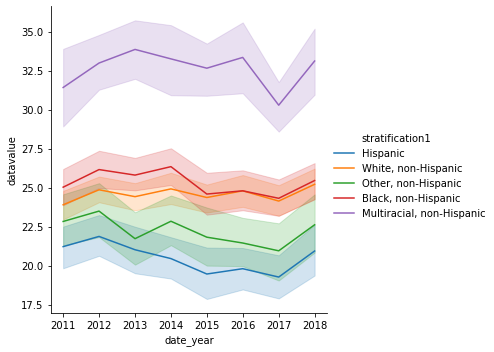

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years') & (art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

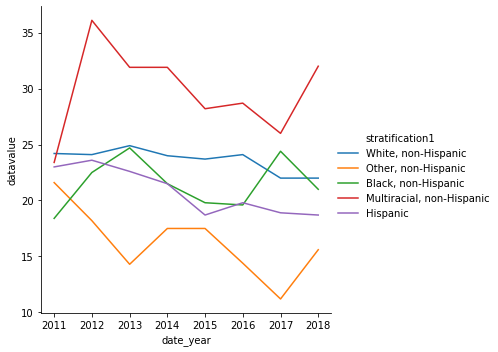

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years') & (art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

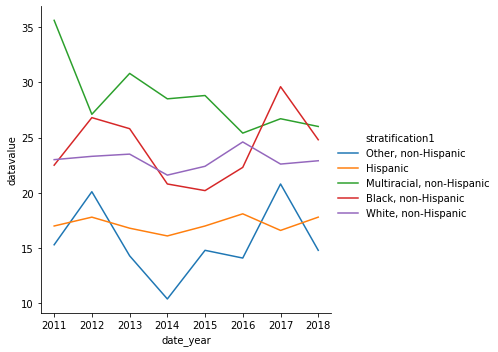

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years') & (art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

All States

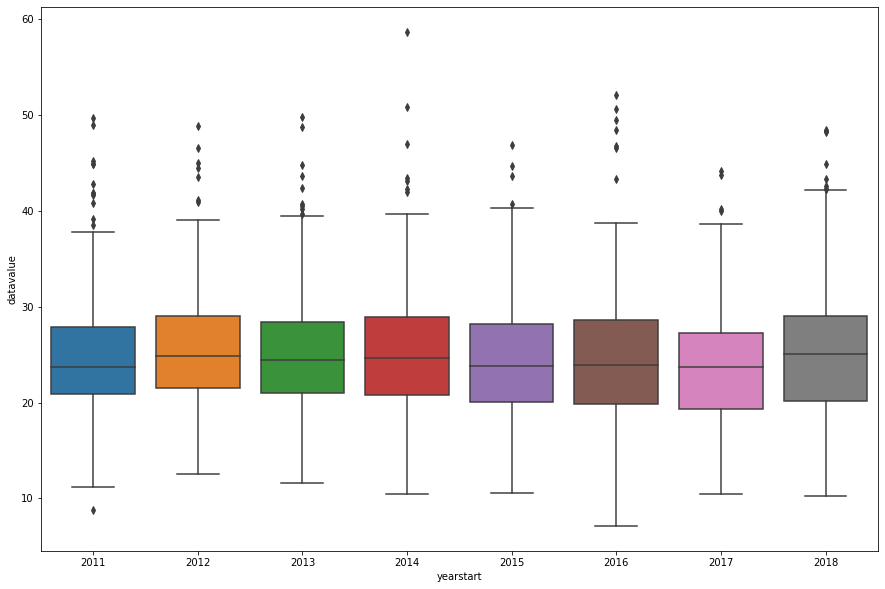

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years')&(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

**Fair or poor health among adults aged >= 18 years with arthritis across genders**

All States

<Figure size 2160x1440 with 0 Axes>

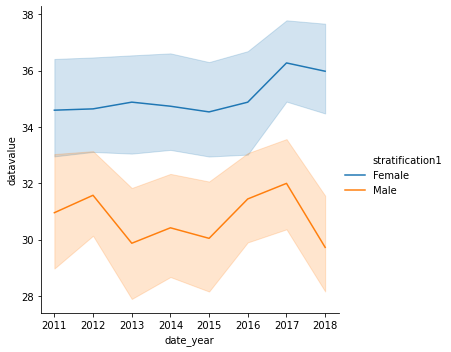

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Fair or poor health among adults aged >= 18 years with arthritis') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

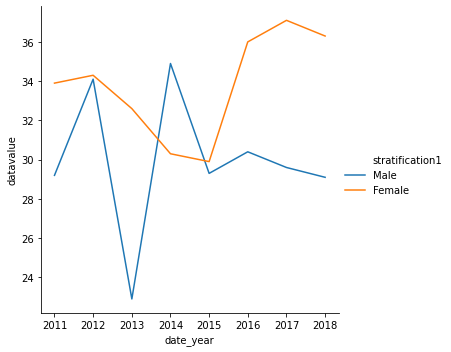

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Fair or poor health among adults aged >= 18 years with arthritis') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

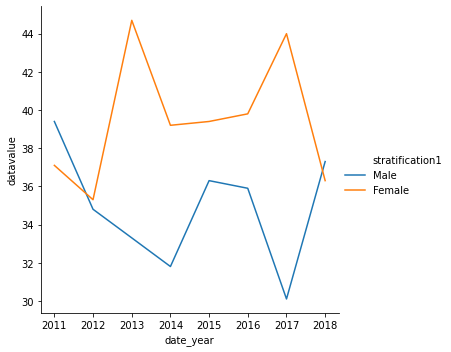

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Fair or poor health among adults aged >= 18 years with arthritis') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

All States

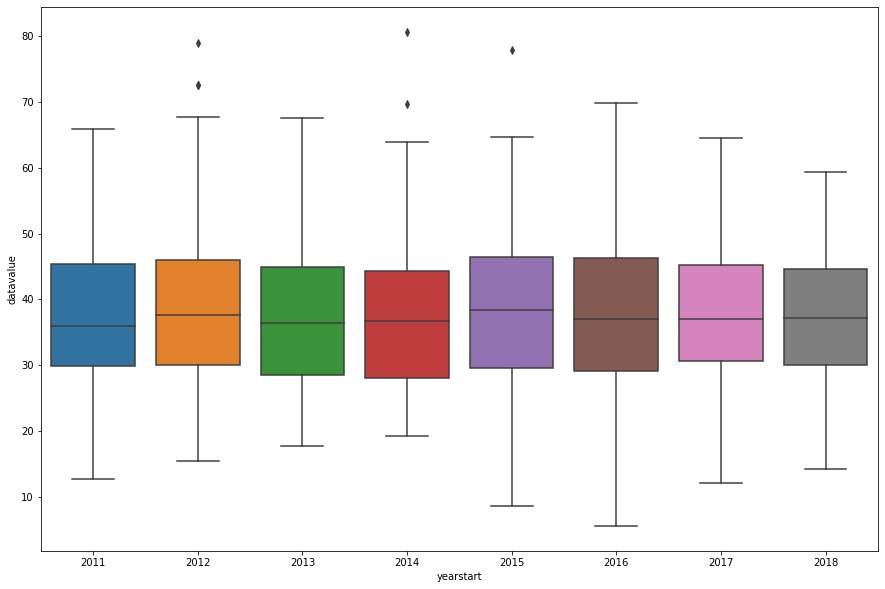

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Fair or poor health among adults aged >= 18 years with arthritis')&(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

**Arthritis among adults aged >= 18 years who have diabetes across genders**

All States

<Figure size 2160x1440 with 0 Axes>

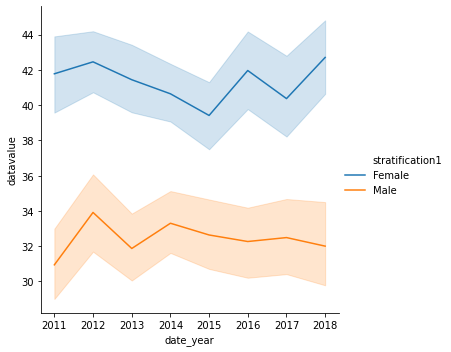

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have diabetes') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

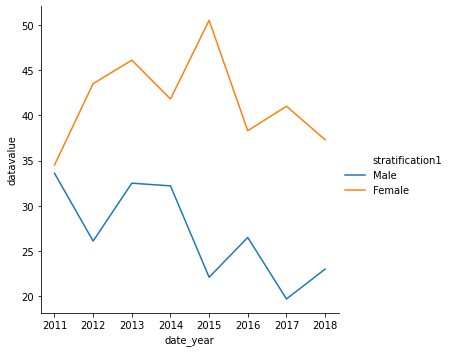

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have diabetes') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

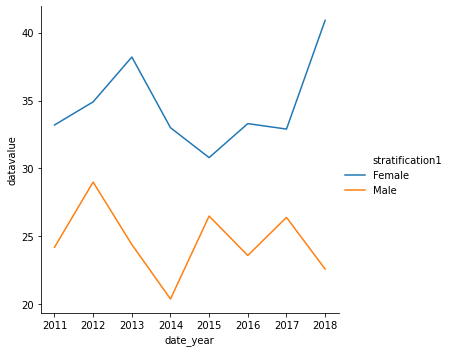

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have diabetes') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

All States

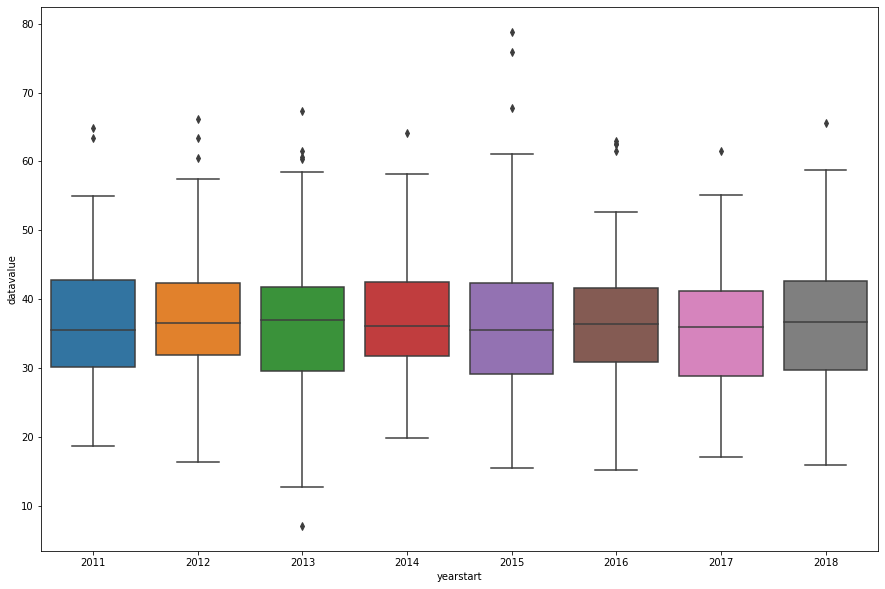

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have diabetes')&(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

**Arthritis among adults aged >= 18 years who have heart disease across genders**

All States

<Figure size 2160x1440 with 0 Axes>

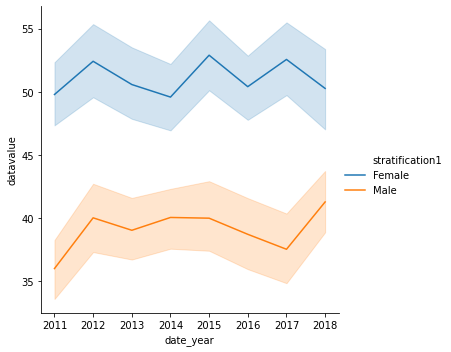

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have heart disease') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

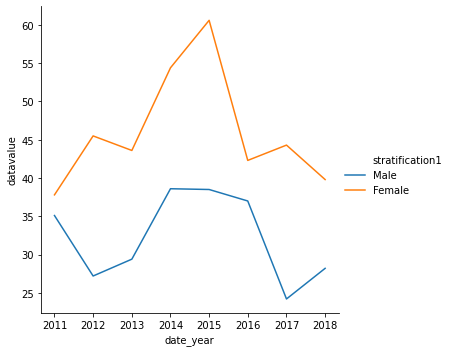

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have heart disease') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

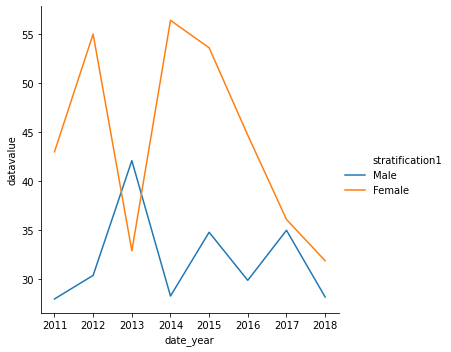

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have heart disease') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

All States

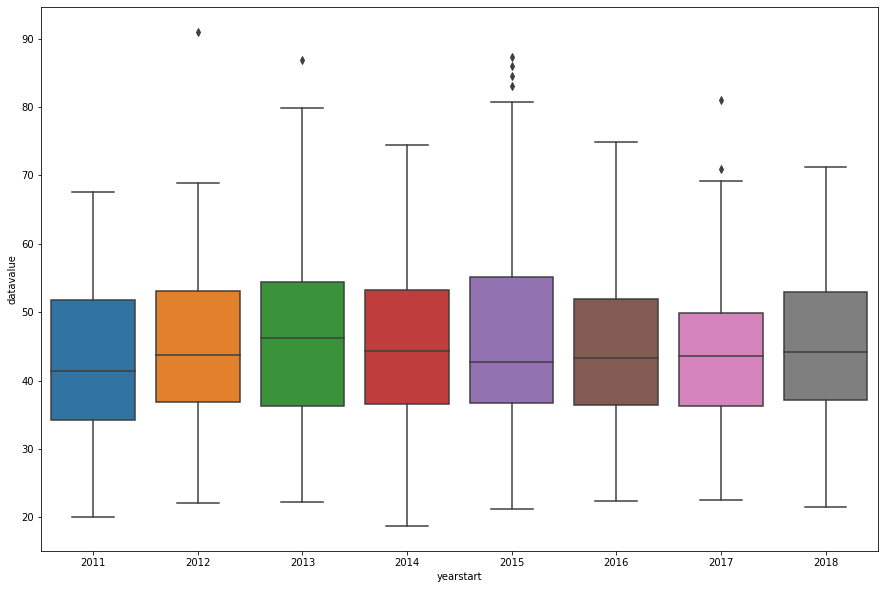

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Arthritis among adults aged >= 18 years who have heart disease')&(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

**Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms across genders**

All States

<Figure size 2160x1440 with 0 Axes>

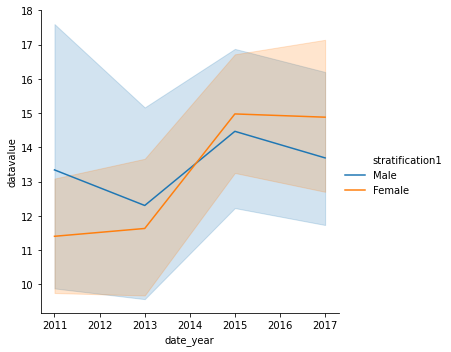

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

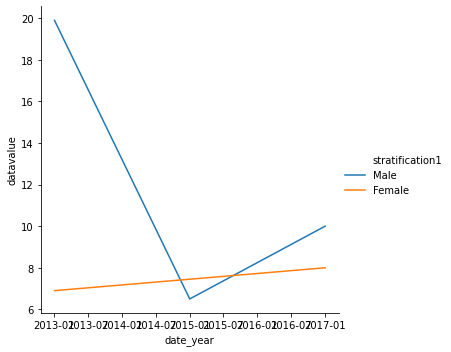

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

Texas

No data available for Texas for this question.

<Figure size 2160x1440 with 0 Axes>

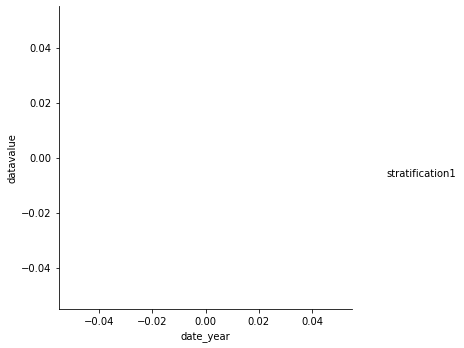

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

In [ ]:
art_cdi_df_01[(art_cdi_df_01['question']=='Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms') & (art_cdi_df_01['locationabbr']=='TX')].head()

,yearstart,locationabbr,datasource,topic,question,datavalueunit,datavaluetype,datavalue,stratificationcategory1,stratification1,date_year


South Carolina (alternative Southern state)

<Figure size 2160x1440 with 0 Axes>

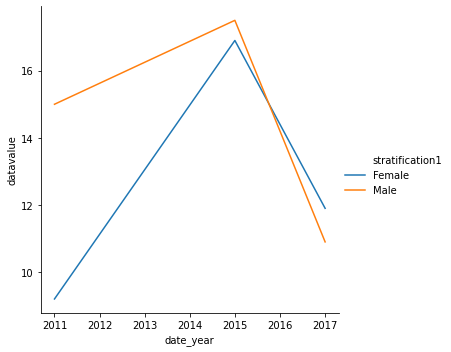

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms') & (art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='SC')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

All State

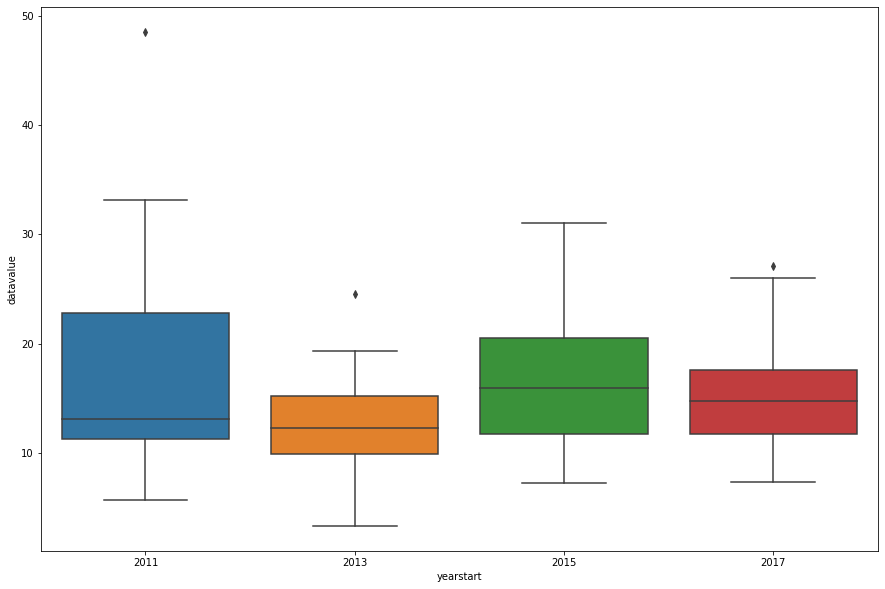

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['question']=='Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms')&(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

**All Questions**

All States

<Figure size 2160x1440 with 0 Axes>

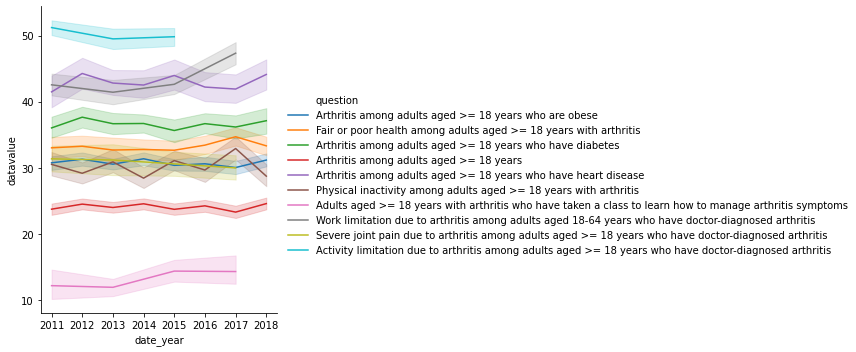

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall')], 
            x='date_year', y='datavalue', hue='question', kind="line")
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

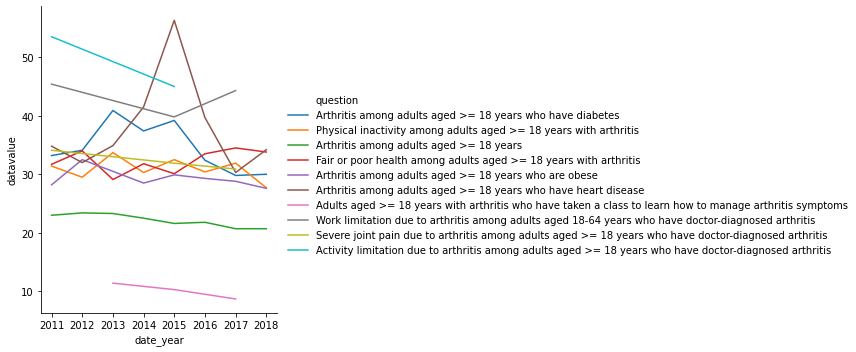

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='question', kind="line")
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

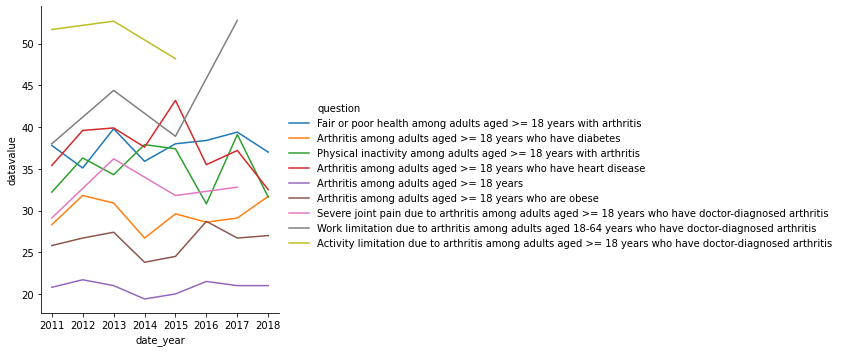

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='question', kind="line")
plt.show()

**No question filter**

**Overall**

All States

<Figure size 2160x1440 with 0 Axes>

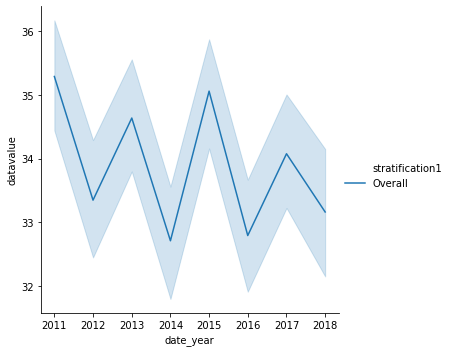

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

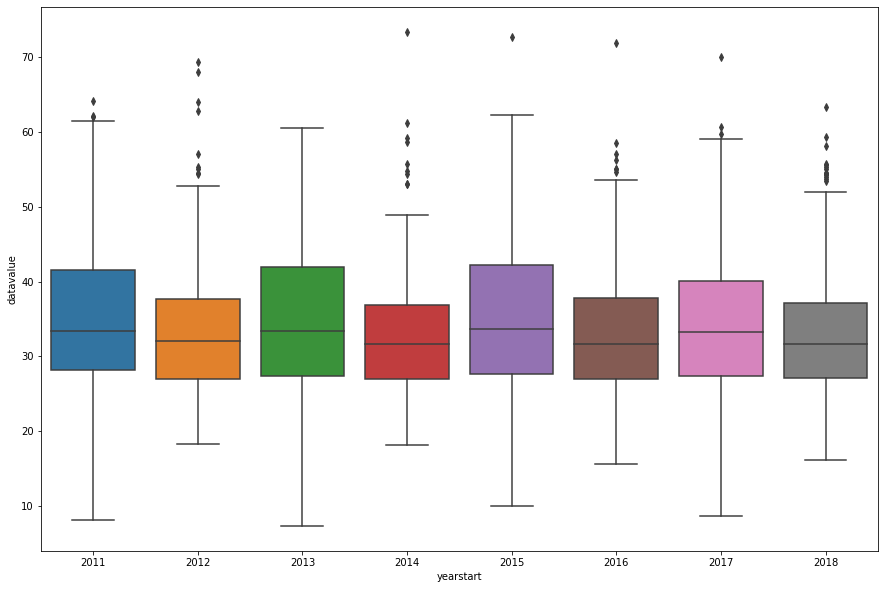

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall')],
            x='yearstart',y='datavalue')
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

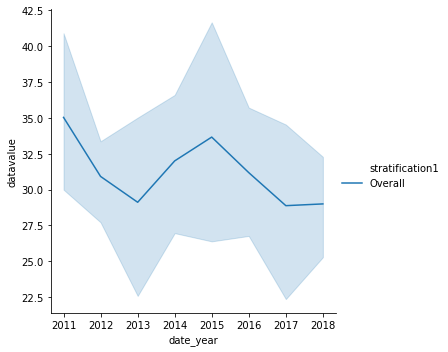

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall') & (art_cdi_df_01_brfss['locationabbr']=='NY')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

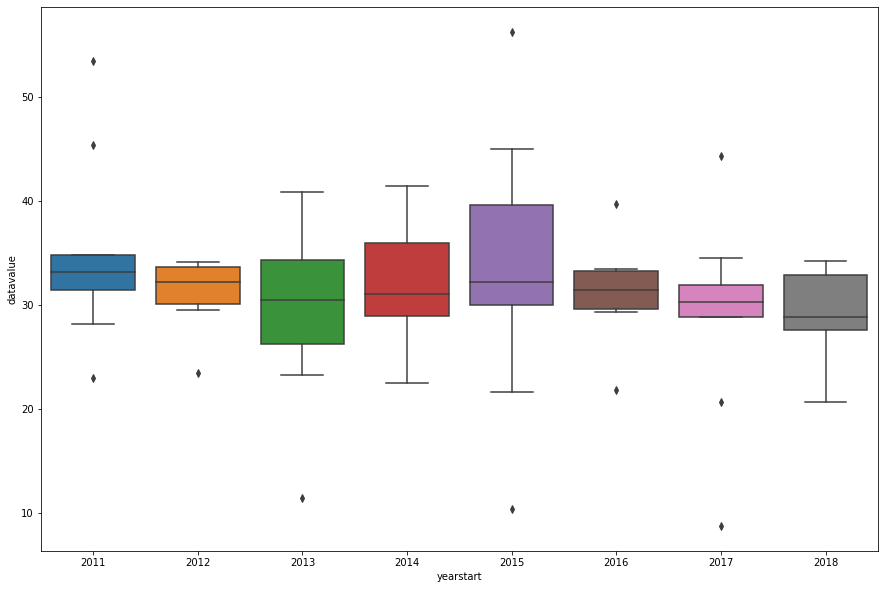

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall') & (art_cdi_df_01_brfss['locationabbr']==('NY'))],
            x='yearstart',y='datavalue')
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

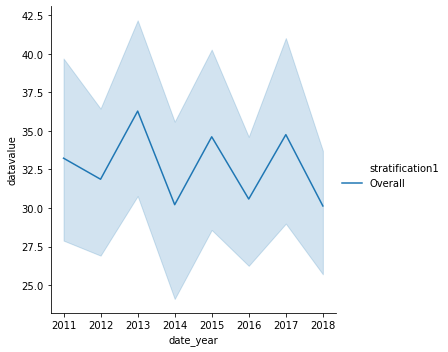

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

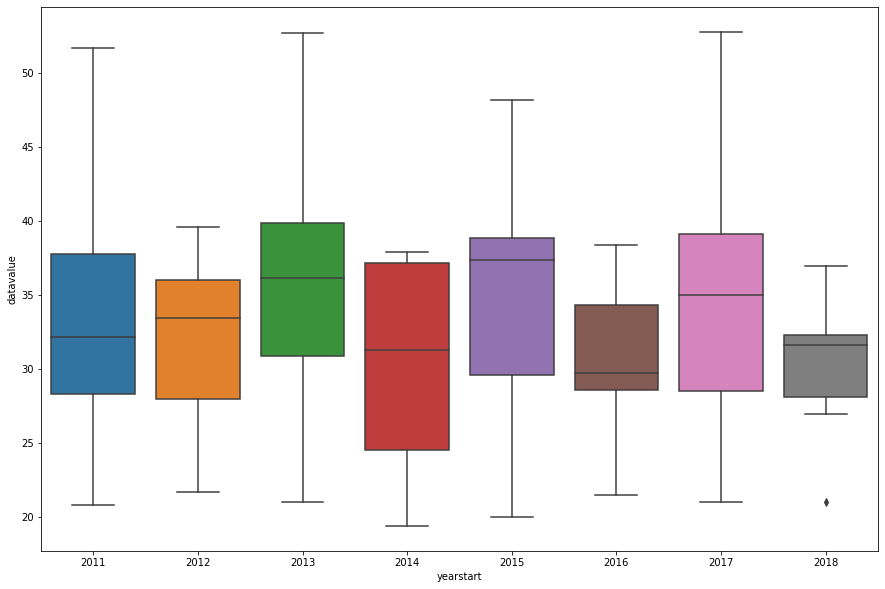

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Overall') & (art_cdi_df_01_brfss['locationabbr']==('TX'))],
            x='yearstart',y='datavalue')
plt.show()

**Race/Ethnicity**

All States

<Figure size 2160x1440 with 0 Axes>

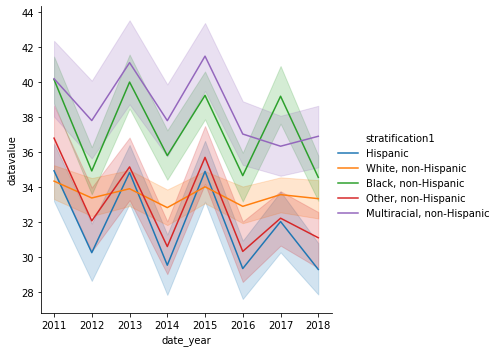

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

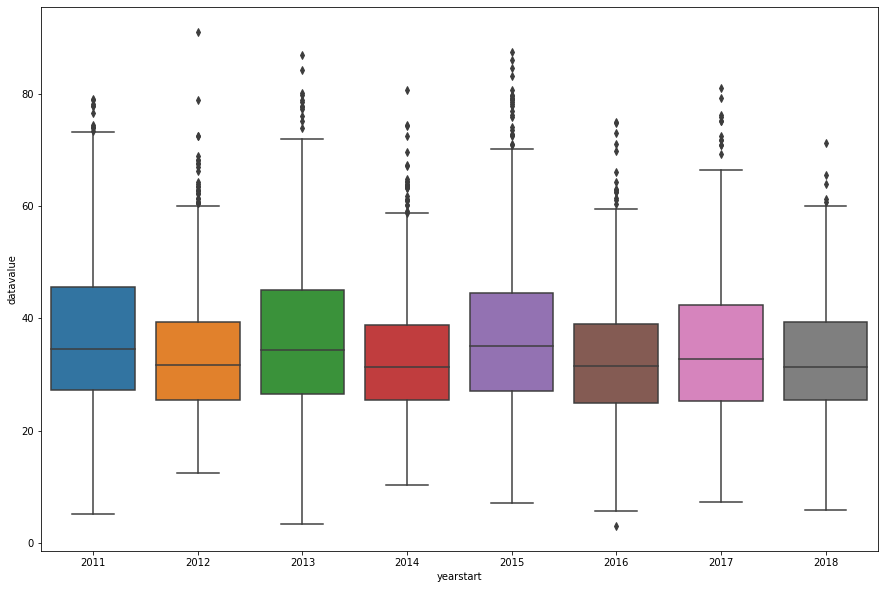

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

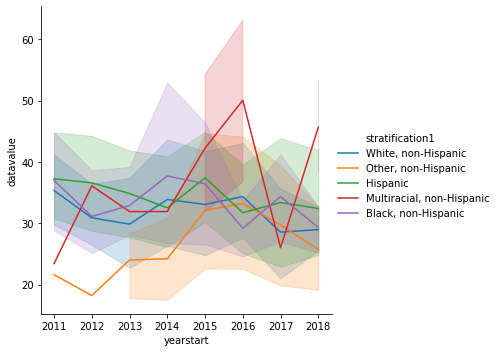

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity') & (art_cdi_df_01_brfss['locationabbr']=='NY')],
            x='yearstart',y='datavalue', hue='stratification1', kind="line")
plt.show()

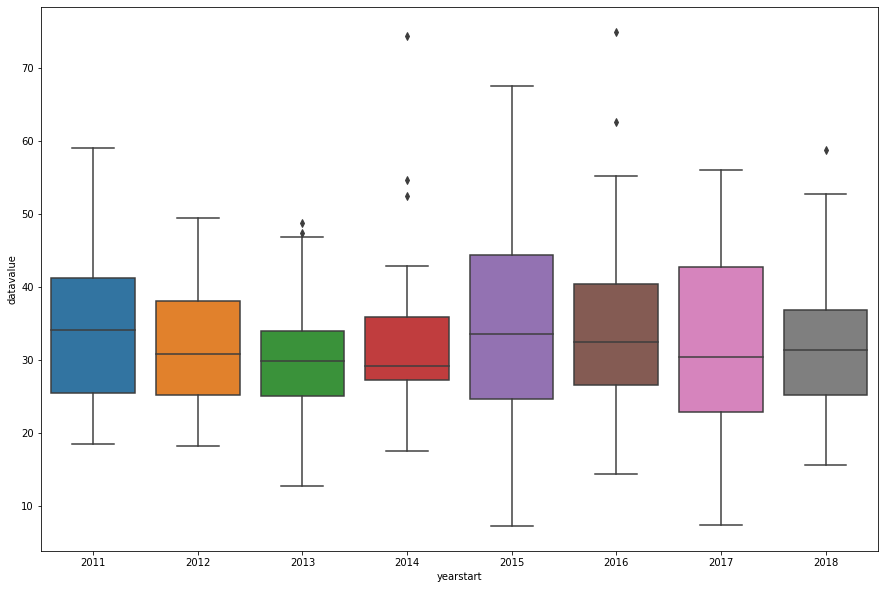

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity') & (art_cdi_df_01_brfss['locationabbr']=='NY')],
            x='yearstart',y='datavalue')
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

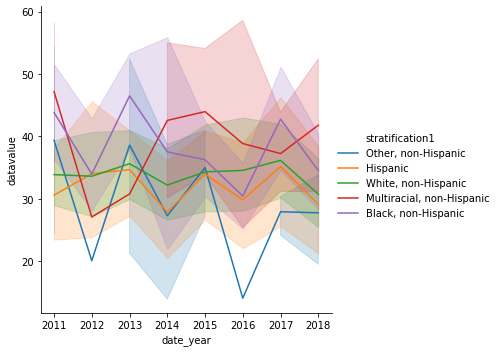

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity') & (art_cdi_df_01_brfss['locationabbr']=='TX')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

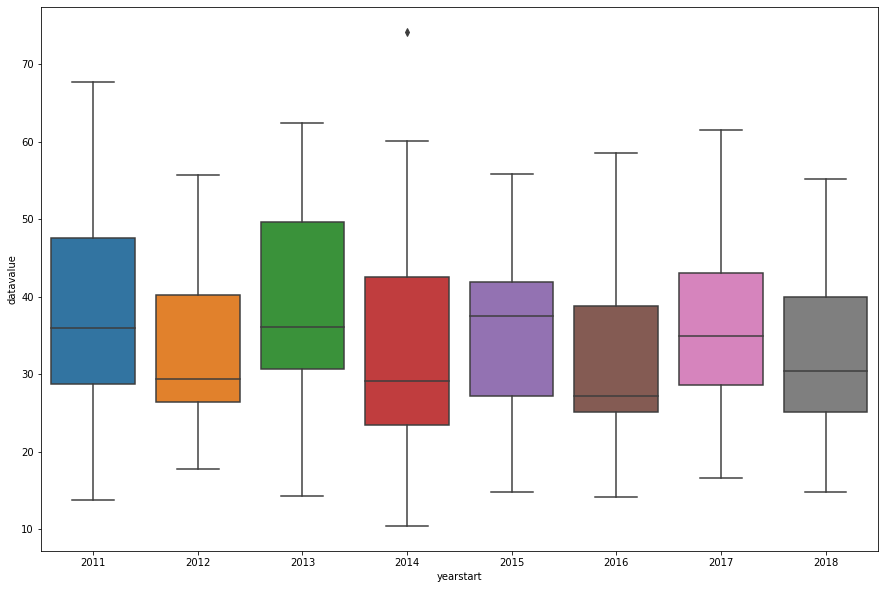

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity') & (art_cdi_df_01_brfss['locationabbr']=='TX')],
            x='yearstart',y='datavalue')
plt.show()

**Gender**

All States

<Figure size 2160x1440 with 0 Axes>

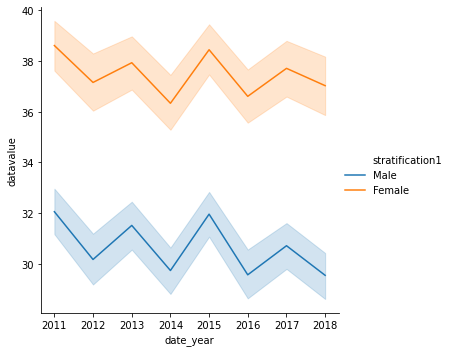

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Gender')], 
            x='date_year', y='datavalue', hue='stratification1', kind="line")
plt.show()

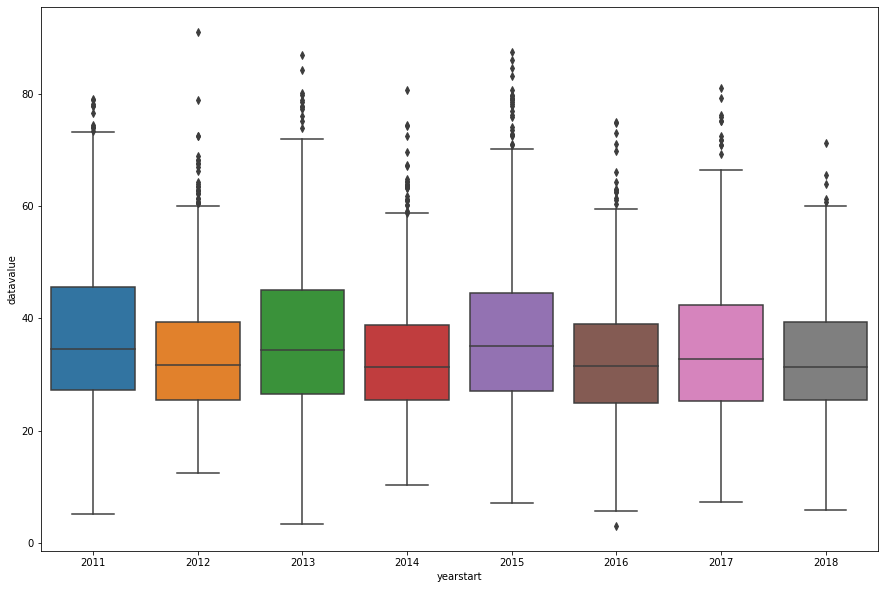

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Race/Ethnicity')],
            x='yearstart',y='datavalue')
plt.show()

New York

<Figure size 2160x1440 with 0 Axes>

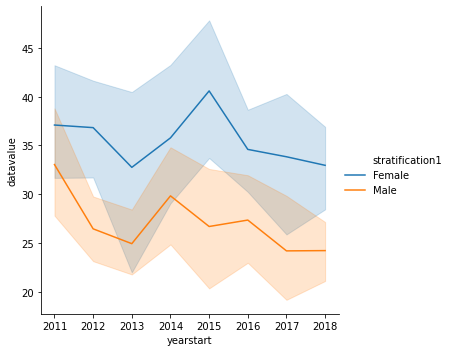

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='NY')],
            x='yearstart',y='datavalue', hue='stratification1', kind="line")
plt.show()

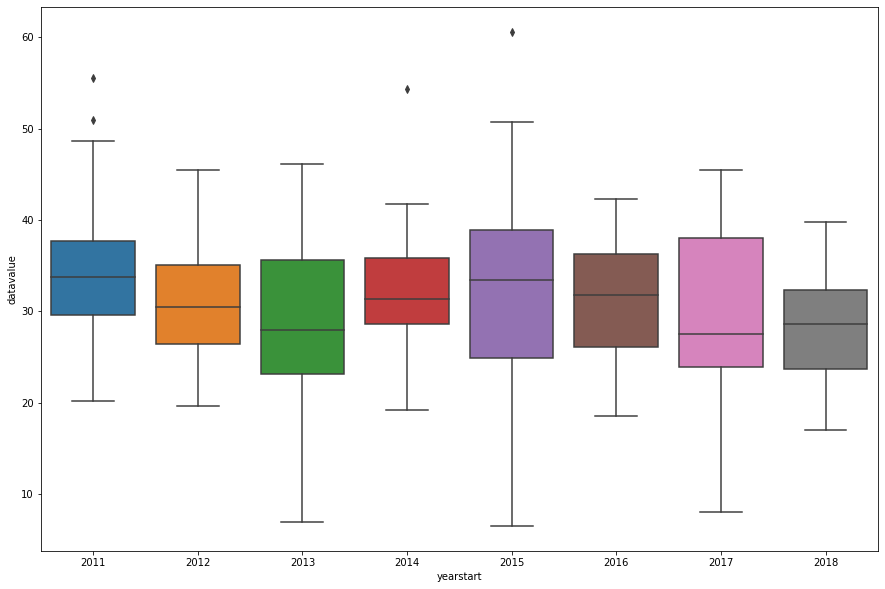

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='NY')],
            x='yearstart',y='datavalue')
plt.show()

Texas

<Figure size 2160x1440 with 0 Axes>

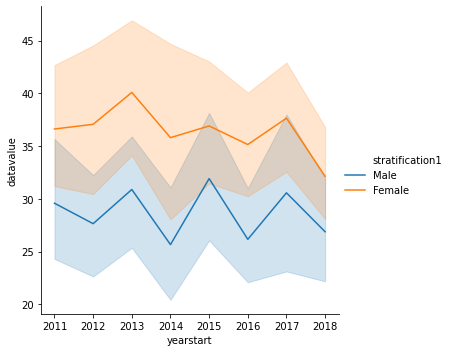

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.relplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='TX')],
            x='yearstart',y='datavalue', hue='stratification1', kind="line")
plt.show()

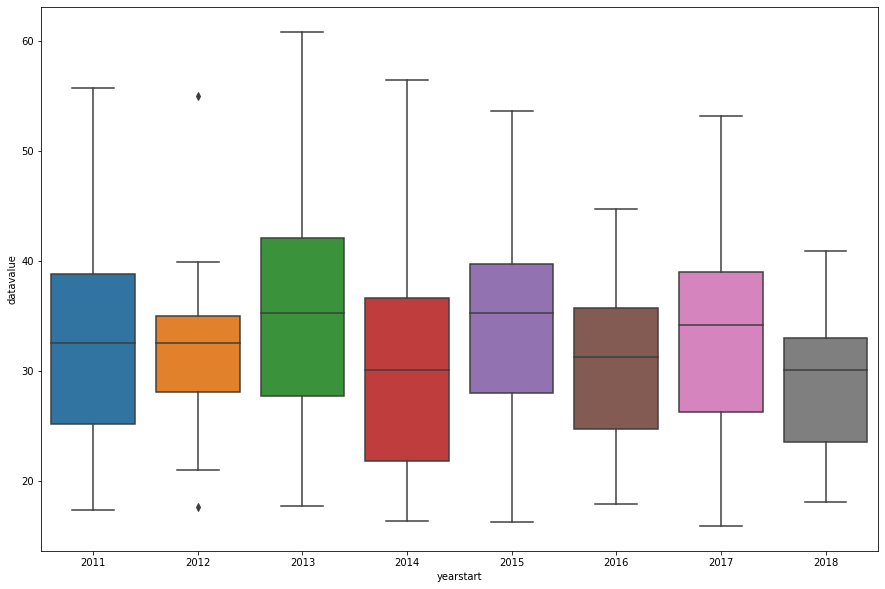

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=art_cdi_df_01_brfss[(art_cdi_df_01_brfss['stratificationcategory1']=='Gender') & (art_cdi_df_01_brfss['locationabbr']=='TX')],
            x='yearstart',y='datavalue')
plt.show()

**Conclusion**


New York and Texas were selected in the analysis to see if location plays a part in levels of arthritis in the US, compared to All States (US).

The population studied are adults at least 18 years of age.

As far as gender, females have signficantly higher arthritis datavalues than males generally in the selected questions regardless of location, but if class is taken to manage arthritis symptoms, females are slightly above males and in New York, levels for females are under males and in South Carolina (substituting Texas for lack of data), males and females have about the same levels, both showing a significant decline starting in 2017.  Interestingly, although, the gap closes for females and males when the class is taken, there is an upward trend in both males and females having arthritis in All States and New York.  The median for All States is highest in 2015 at about 15 datvalue. 75% quartile is lowest in 2013 at under 15 datavalue.  Data is available for every 2 years in the boxplot.

For fair or poor health among adults with arthritis, All States show a stable trend whereas New York and Texas shows fluctuations, with New York showing an upward trend for females.  In Texas, males and females levels have an inverse relationship.  The median for All States is about 35 datavalue, 25% quartile at 30, and 75% quartile at about 45, with few outliers above 70.

For arthritis among adults who have diabetes, the trend for both males and females are stable for All States, but New York and Texas shows fluctuations for both males and females.  The median for All States is about 35 datavalues, 25% quartile at about 30, and 75% quartile at a little above 40, with some outliers above 60.

Similarly, for arthritis among adults who have heart disease, the trend for both males and females are stable for All States, but New York and Texas shows fluctuations for both males and females.  The median for All States is about 40-45 datavalues, 25% quartile at about 35-40, and 75% quartile at about 50, with few outliers above 80.

As for race/ethnicity, for arthritis among adults (without health conditions specified), the trend is steadily flat for All States, with Hispanic having the lowest level of arthritis and Others for New York and Texas.  Multiracial having higher datavalues than other race/ethnicities for All States, New York, and Texas.  The median for All States is about 25 datavalues across all years 25% quartile at 20 datavalue, 75% quartile at near 30, with some outliers above 40.

Comparing All Questions, generally, activity and work limitation due to arthritis among adults who have doctor-diagnosed arthritis have the highest datavalue for arthritis that is common for All State, New York, and Texas. Arthritis among adults who have diabetes or heart disease have high levels as well. Adults with arthritis who have taken a class to learn how to manage arthritis symptoms have the lowest datavalues for All State and New York (no data available for Texas).  Arthritis among adults (with no other health conditions specified shows lowest level for Texas.  Arthritis among adults who have diabetes is high in New York with arthritis among adults who have heart disease dropped significantly from 2015-2018.  In comparing All Questions, the trend is stable for All State and New York, with fluctuation for Texas.

For race/ethnicity, regardless of questions breakdown, Multi-racial have highest datavalues for All State, New York, and Texas.  Hispanic or Other have lowest datavalues for All State, New York, and Texas.  Dramatic fluctuations is seen every year with White having the most stable levels of arthritis for All State, New York, Texas.  The median for All States is about 35, the 25% quartile is steady at under 30, and 75% quartile varies from under 40 to above 40 across the years.  For New York, the median is about 30-35 and the 25% quartile fluctuates about 35 to 35 across the years.  For Texas, the median fluctuates about 30-35 and the 75% quartile fluctuates 40-45 datavalues across the years.

For gender, regardless of questions breakdown, females generally have higher datavalues than males for All States, New York, and Texas.  For All State, the difference is significant between males and females.  New York and Texas shows fluctuations, with New York showing males and females fluctuating similarly.  The median for All States and New York are stable across the years.  

Regardless of questions breakdown, race/ethnicity, and gender, arthritis levels fluctuate dramatically year after year generally, for All States and Texas, with New York having a slight decline in arthritis.  In fact, in 2014 the 25% quartiles was as low as 25 datavalue for Texas.

The mean for All States, New York, and Texas is about mid 30 datavalues.  The standard deviation is about 11 for All States, New York, and Texas.  The min, max, 25%, 50%, and 75% quartiles are almost the same for New York and Texas.  The inter-quartiles are similar to All States.  The min and max for New York and Texas are reasonably lower than All States.

Overall, All States show more stable trends than New York and Texas.  New York and Texas show close statistics.  Females have higher datavalues of arthritis than males.  Multi-racial tend to have highest datavalues and Hispanics tend to have lowest data values.  Taking a class to manage arthritis symptoms shows some improvement.  Inactivity, heart disease, and diabetes contributes to higher levels of arthritis.  Location is not a main factor in the data outcome.  


**References**

1. https://healthdata.gov/dataset/us-chronic-disease-indicators-cdi

2. https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725

3. https://dev.socrata.com/consumers/getting-started.html

4. https://dev.socrata.com/foundry/chronicdata.cdc.gov/g4ie-h725

5. https://dev.socrata.com/docs/filtering.html
